<a href="https://colab.research.google.com/github/IrinaRez/Project_detect_trafic_signs/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Data

In [1]:
from google.colab import drive
from google.colab import files

In [2]:
!mkdir GD

In [3]:
drive.mount('/GD',force_remount=True)

Mounted at /GD


In [4]:
!cp -r /GD/'My Drive'/'Birds'/archive.zip .

In [5]:
!unzip archive.zip 

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/WHITE NECKED RAVEN/006.jpg  
  inflating: train/WHITE NECKED RAVEN/007.jpg  
  inflating: train/WHITE NECKED RAVEN/008.jpg  
  inflating: train/WHITE NECKED RAVEN/009.jpg  
  inflating: train/WHITE NECKED RAVEN/010.jpg  
  inflating: train/WHITE NECKED RAVEN/011.jpg  
  inflating: train/WHITE NECKED RAVEN/012.jpg  
  inflating: train/WHITE NECKED RAVEN/013.jpg  
  inflating: train/WHITE NECKED RAVEN/014.jpg  
  inflating: train/WHITE NECKED RAVEN/015.jpg  
  inflating: train/WHITE NECKED RAVEN/016.jpg  
  inflating: train/WHITE NECKED RAVEN/017.jpg  
  inflating: train/WHITE NECKED RAVEN/018.jpg  
  inflating: train/WHITE NECKED RAVEN/019.jpg  
  inflating: train/WHITE NECKED RAVEN/020.jpg  
  inflating: train/WHITE NECKED RAVEN/021.jpg  
  inflating: train/WHITE NECKED RAVEN/022.jpg  
  inflating: train/WHITE NECKED RAVEN/023.jpg  
  inflating: train/WHITE NECKED RAVEN/024.jpg  
  inflating: train/W

In [6]:
!ls

 archive.zip					  GD		       test
 birds.csv					 'images to predict'   train
'EfficientNetB0 model-510-(224 X 224)-99.21.h5'   sample_data	       valid


In [7]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.image as Image
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

##Visualization

In [8]:
input_shape = (224,224,3)
resnet_weights_path = 'imagenet'
num_classes = 510
image_size = 224
batch_size = 64

train_path = 'train/'
valid_path = 'valid/'
test_path = 'test/'

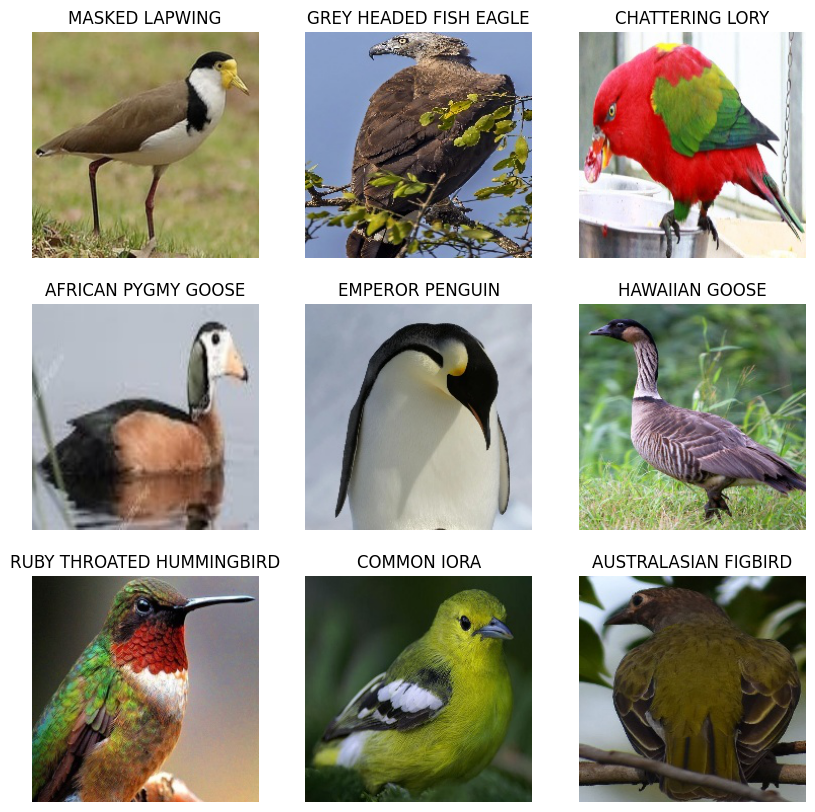

In [9]:
fig = plt.figure(figsize=(10, 10))
i = 0
for sub_dir in os.listdir(train_path)[:9]:
    i+=1
    img_file = os.listdir(os.path.join(train_path,sub_dir))[0]
    img_path = os.path.join(train_path, sub_dir, img_file)
    img = Image.imread(img_path)
    a=fig.add_subplot(3, 3,i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(sub_dir)
plt.show()

In [10]:
def counter (path):
  ls = []
  for species in os.listdir(path):
    count = len(os.listdir(os.path.join(path, species)))
    ls.append([species, count])
    df = pd.DataFrame(ls, columns = ['species', 'count'])
  return df

df_train_count = counter (train_path)
df_test_count = counter (test_path)
df_valid_count = counter (valid_path)

In [11]:
df_train_count.describe()

count
count  510.000000
mean   160.686275
std     20.370334
min    130.000000
25%    150.000000
50%    157.500000
75%    167.000000
max    274.000000

In [16]:
data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
train_generator = data_generator.flow_from_directory(train_path,
                                                    target_size = (image_size,image_size),
                                                    batch_size = batch_size, 
                                                    shuffle = True, 
                                                    class_mode = 'categorical')


val_generator = data_generator.flow_from_directory(valid_path,
                                                    target_size = (image_size,image_size),
                                                    batch_size = batch_size, 
                                                    shuffle = False,
                                                    class_mode = 'categorical')

test_generator = data_generator.flow_from_directory(test_path,
                                                    target_size = (image_size,image_size),
                                                    batch_size = batch_size, 
                                                    shuffle = False,
                                                    class_mode = 'categorical')

Found 81950 images belonging to 510 classes.
Found 2550 images belonging to 510 classes.
Found 2550 images belonging to 510 classes.


##Model

In [17]:
resnet_model = Sequential()
resnet_model.add(ResNet50(include_top = False,
                         pooling = 'avg',
                         weights = resnet_weights_path))

resnet_model.add(Dense(num_classes, activation = 'softmax'))

resnet_model.layers[0].trainable = True


94765736/94765736 [==============================] - 1s 0us/step


In [18]:
resnet_model.compile(loss = 'categorical_crossentropy', 
                     optimizer='sgd', 
                     metrics=['accuracy'])

In [19]:
history = resnet_model.fit(train_generator, steps_per_epoch=700, batch_size= batch_size,
                           validation_data=val_generator, epochs=15)

Epoch 1/15
700/700 [==============================] - 484s 656ms/step - loss: 3.6680 - accuracy: 0.3881 - val_loss: 1.2304 - val_accuracy: 0.7929
Epoch 2/15
700/700 [==============================] - 459s 656ms/step - loss: 1.0121 - accuracy: 0.8249 - val_loss: 0.5452 - val_accuracy: 0.9008
Epoch 3/15
700/700 [==============================] - 459s 655ms/step - loss: 0.5468 - accuracy: 0.8985 - val_loss: 0.3398 - val_accuracy: 0.9278
Epoch 4/15
700/700 [==============================] - 459s 656ms/step - loss: 0.3608 - accuracy: 0.9329 - val_loss: 0.2538 - val_accuracy: 0.9490
Epoch 5/15
700/700 [==============================] - 458s 654ms/step - loss: 0.2624 - accuracy: 0.9512 - val_loss: 0.2306 - val_accuracy: 0.9525
Epoch 6/15
700/700 [==============================] - 458s 654ms/step - loss: 0.1958 - accuracy: 0.9664 - val_loss: 0.1931 - val_accuracy: 0.9561
Epoch 7/15
700/700 [==============================] - 458s 654ms/step - loss: 0.1515 - accuracy: 0.9753 - val_loss: 0.1782 -

##Model Evaluation

In [20]:
test_predictions = resnet_model.predict(test_generator)
test_labels = test_generator.classes
test_files = test_generator.filepaths
class_labels = list(test_generator.class_indices.keys())

40/40 [==============================] - 11s 265ms/step


In [21]:
result = resnet_model.evaluate(test_generator)

40/40 [==============================] - 10s 252ms/step - loss: 0.0793 - accuracy: 0.9835


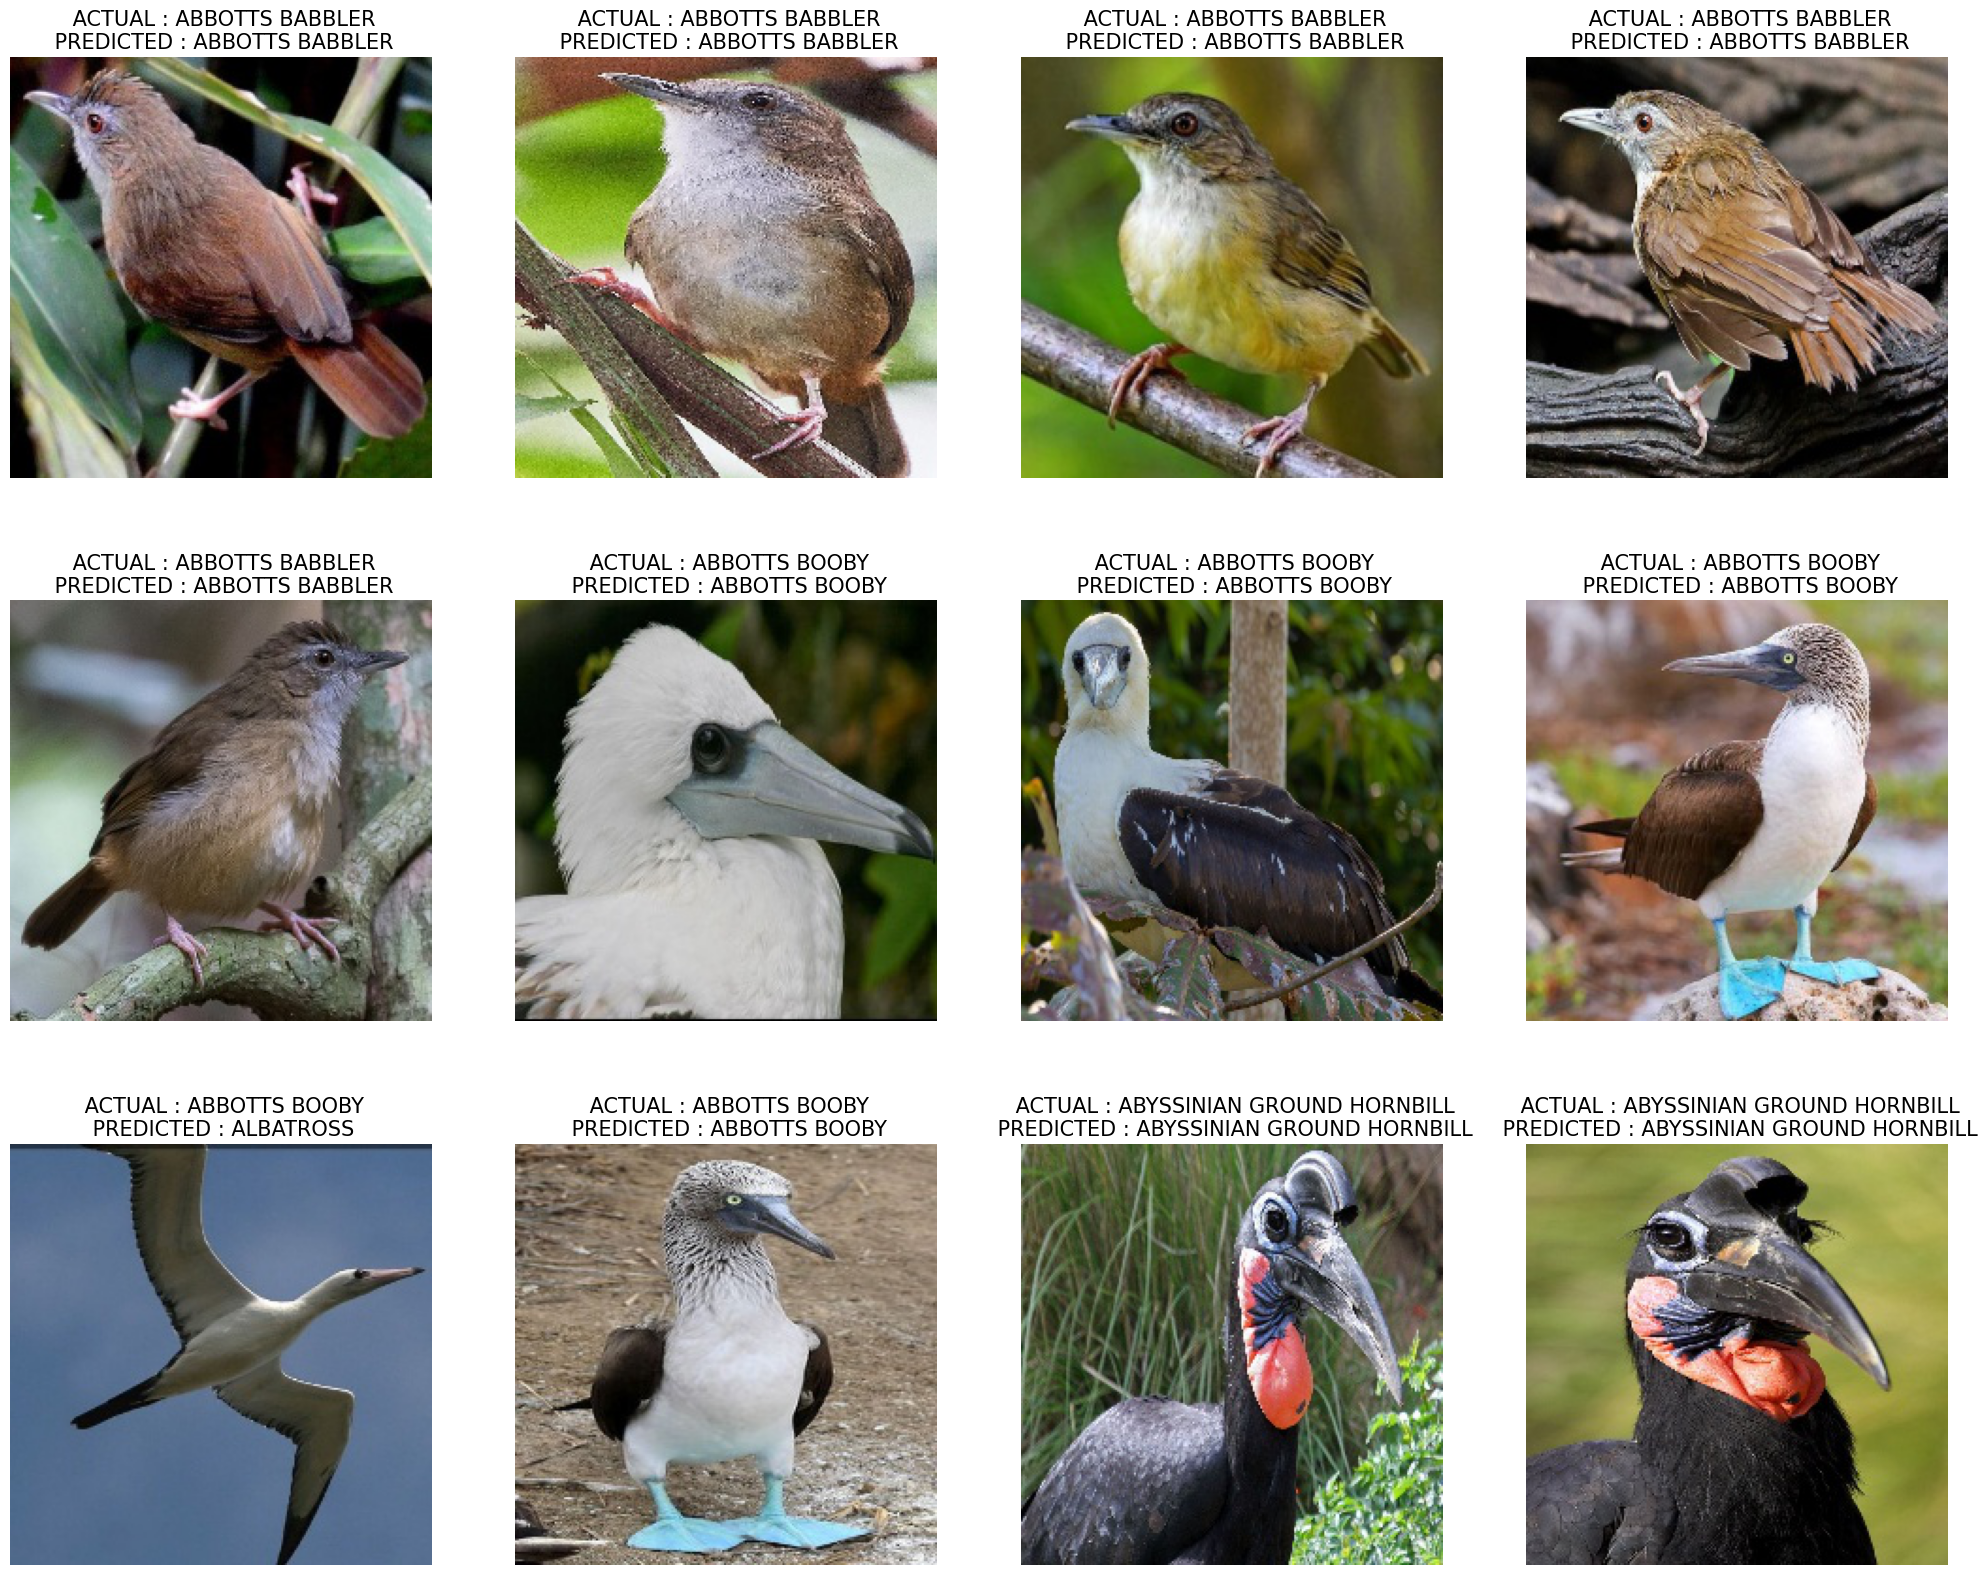

In [22]:
length = len(test_labels)
sample = min(length, 12)
    
for i in range(sample):
    plt.rcParams['figure.figsize'] = (25, 20)
    img = plt.imread(test_files[i])
    pred_label = np.argmax(test_predictions[i])
    actual_label = test_labels[i] 
    
    plt.subplot(3,4,i+1)
    plt.imshow(img)
    plt.title(f" ACTUAL : {class_labels[actual_label]}\n PREDICTED : {class_labels[pred_label]}",fontdict={'fontsize': 15})
    plt.axis('off')
    
plt.show()

In [23]:
def plot_graghs(history, metric):
  plt.rcParams['figure.figsize'] = (10, 8)
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

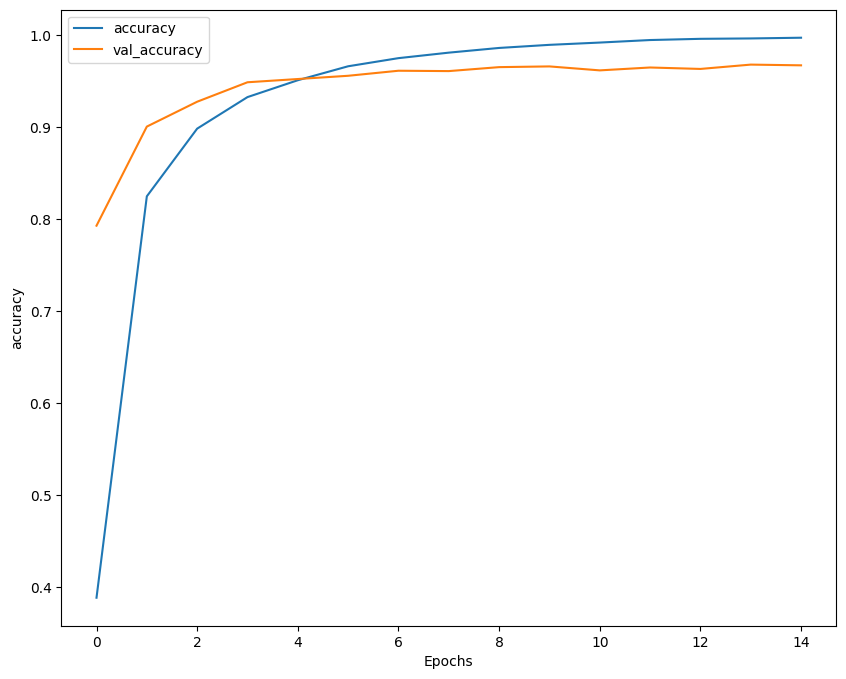

In [24]:
plot_graghs(history, 'accuracy')

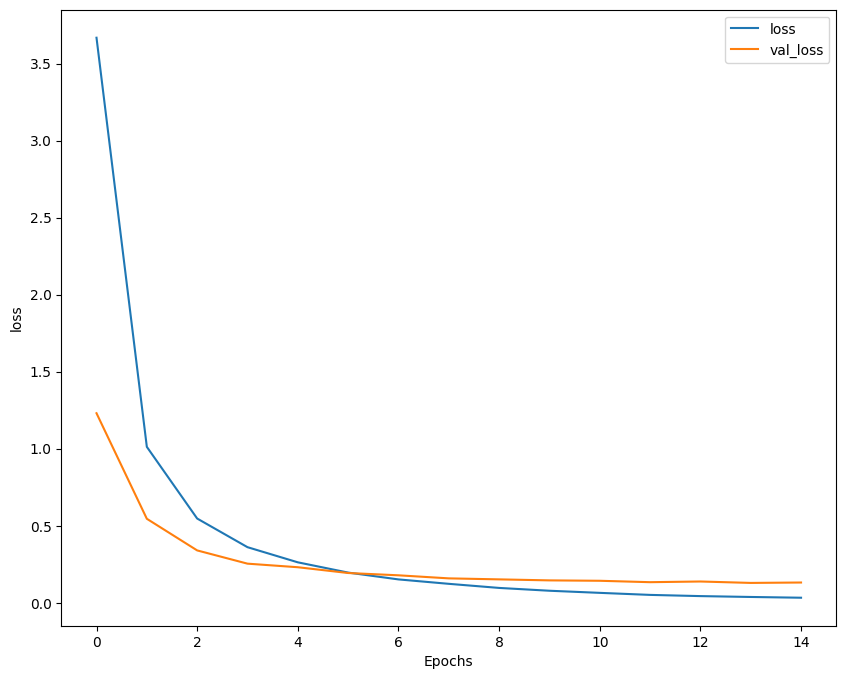

In [25]:
plot_graghs(history, 'loss')
